In [1]:
#Cambiar a entorno virtual y cargar paquetes

import numpy as np
import pandas as pd
from prophet import Prophet
import statsmodels.api as sm
from pysyncon import Dataprep, Synth, AugSynth, PenalizedSynth, RobustSynth
from pysyncon.utils import PlaceboTest
import holidays
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
from factor_analyzer import FactorAnalyzer
import seaborn as sns
import loess 
from  pydynpd import regression
import os 
from plotnine import ggplot, aes, geom_point, geom_errorbar, geom_vline, geom_line, theme, theme_bw
from plotnine import element_blank, labs, guide_legend, scale_color_manual, ggtitle, facet_wrap, geom_ribbon


from copy import deepcopy
from warnings import filterwarnings
from scpi_pkg.scdata import scdata
from scpi_pkg.scdataMulti import scdataMulti
from scpi_pkg.scest import scest
from scpi_pkg.scpi import scpi
from scpi_pkg.scplot import scplot
from scpi_pkg.scplotMulti import scplotMulti
import random

########################################
#os.chdir(r'C:\Users\juanc\Dropbox\Investigacion\Visiting IEDIS UZ\Data')
filterwarnings("ignore")

<Axes: xlabel='Year'>

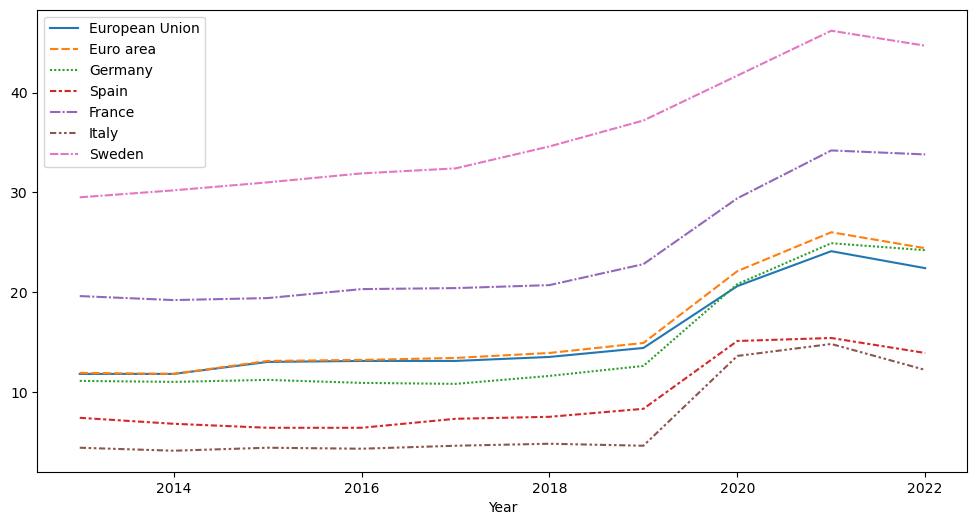

In [36]:
data = pd.read_csv(r'C:\Users\juanc\Dropbox\Investigacion\Visiting IEDIS UZ\Data\telework_eu.csv')
data.index=data['Year']
data = data.drop(columns='Year')
plt.figure(figsize=(12, 6))

sns.lineplot(data=data)

In [3]:
#data = pd.read_csv(r'C:\Users\34645\Desktop\Doctorado_II\Códigos_Python\IEDIS\Data\dataset_prueba.csv')
data = pd.read_csv(r'C:\Users\juanc\Dropbox\Investigacion\Visiting IEDIS UZ\Data\dataset_daily.csv')
data2 = pd.read_csv(r'C:\Users\juanc\Dropbox\Investigacion\Visiting IEDIS UZ\Data\dataset_weekly_noweekend.csv')

data['date'] = pd.to_datetime(data['date'])
# Describir serie temporal del movimiento en las provincias españolas 
data.set_index('date', inplace=True, drop=False)
data[data['flag']==True].describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,CPRO,Edad mediana de la población (años),Esperanza de vida al nacer (Años),Número medio de hijos por mujer (Número),...,"Uso del suelo (%): Zonas verdes urbanas, instalaciones deportivas y de ocio",Valor_Stringency,Valor_GovernmentResponseIndex,Valor_EconomicSupportIndex,Valor_Containment,Periodo,workplaces,CMUN,ansiedad,smoothed_ansiedad
count,68180.000000,68112.000000,68084.000000,68043.000000,68180.000000,68180.000000,68180.000000,68180.000000,68180.00000,68180.000000,...,6.818000e+04,68180.000000,68180.000000,68180.000000,68180.00000,68180.000000,68180.000000,68180.000000,68180.000000,68180.000000
mean,-22.837944,3.084728,12.950370,-18.328190,-22.249061,5.595820,24.742857,44.398486,83.57238,1.292985,...,7.700000e-01,49.965513,54.321509,69.943532,52.09038,487.500000,-21.409701,61.614286,8.583940,8.569009
std,24.555555,26.782154,51.791467,27.422878,20.049667,7.873372,13.414042,2.298818,0.93046,0.103614,...,3.330693e-16,20.125988,14.004813,31.993751,11.99435,281.171495,13.657058,41.696586,27.065928,10.958414
min,-97.000000,-95.000000,-94.000000,-95.000000,-92.000000,-12.000000,1.000000,38.880000,79.33000,0.910000,...,7.700000e-01,8.330000,11.460000,0.000000,13.10000,1.000000,-77.508976,1.000000,0.000000,-3.101890
25%,-32.000000,-6.000000,-15.000000,-33.000000,-31.000000,1.000000,13.000000,42.630000,83.50000,1.260000,...,7.700000e-01,35.450000,51.660000,75.000000,46.56000,244.000000,-26.737392,19.000000,0.000000,1.954292
50%,-19.000000,5.000000,5.000000,-17.000000,-18.000000,4.000000,28.000000,44.210000,84.01000,1.350000,...,7.700000e-01,48.490000,57.760000,87.500000,53.87000,487.500000,-18.596308,54.500000,0.000000,4.829904
75%,-9.000000,14.000000,31.000000,-3.000000,-9.000000,8.000000,29.000000,45.870000,84.01000,1.350000,...,7.700000e-01,68.520000,66.150000,87.500000,63.10000,731.000000,-12.407969,99.000000,0.000000,9.766672
max,90.000000,258.000000,543.000000,200.000000,45.000000,48.000000,50.000000,49.540000,85.43000,1.490000,...,7.700000e-01,85.190000,73.330000,87.500000,71.31000,974.000000,7.503961,125.000000,100.000000,71.729998


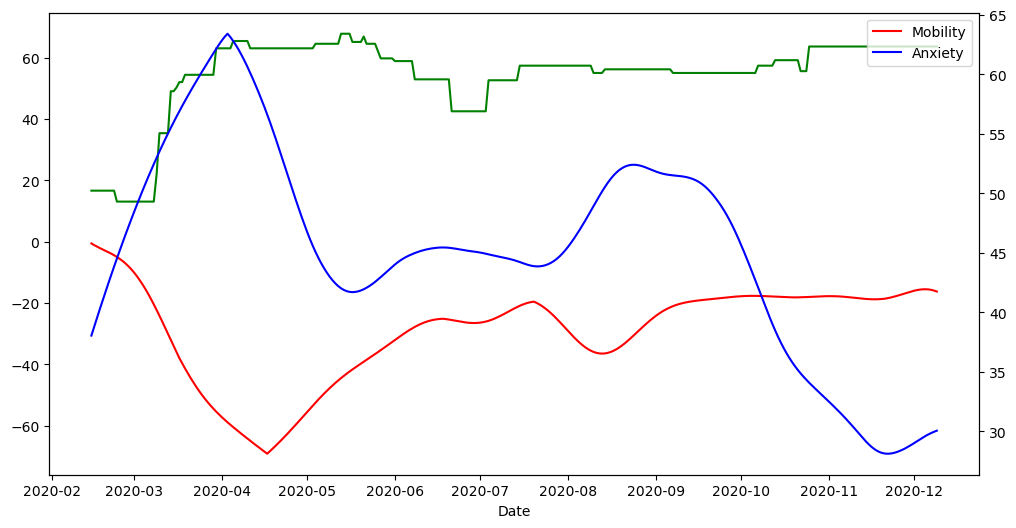

In [37]:
dta = data[data['Municipios'] == 'Zaragoza']
dta = dta[dta['Periodo']<300]
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
a1 = ax1.plot(dta['Valor_Containment'], color='green', label='Containment')
a2 = ax1.plot(dta['workplaces'], color='red', label='Mobility')
a3 = ax2.plot(dta['smoothed_ansiedad'], color='blue', label='Anxiety')
leg = a2 + a3
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=1)
ax1.set_xlabel('Date')
plt.show()


<Axes: xlabel='date', ylabel='workplaces'>

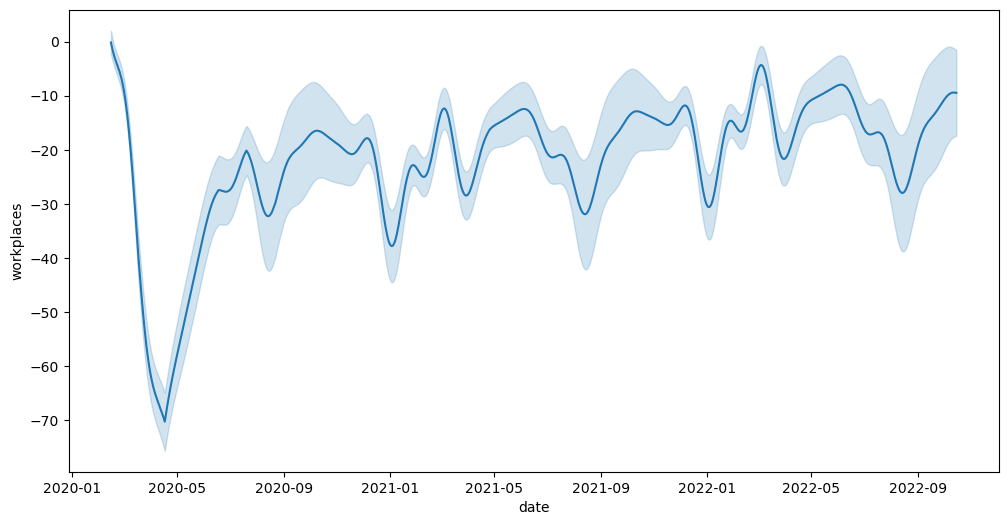

In [26]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='workplaces', errorbar='sd')

In [ ]:
#Set pd to show all columns in DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

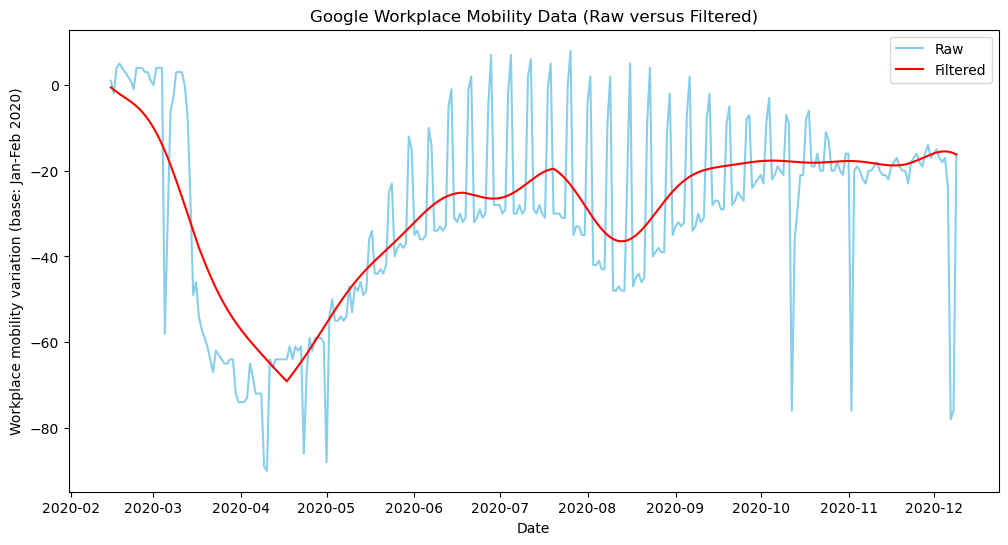

In [121]:
# Filtra los datos solo para la ciudad de 'Zaragoza'
zaragoza_data = data[data['Municipios'] == 'Zaragoza']
zaragoza_data = zaragoza_data[zaragoza_data['Periodo']<300]

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

# # Grafica la serie temporal 'workplaces_percent_change_from_baseline' para Zaragoza
plt.plot(zaragoza_data['date'], zaragoza_data['workplaces_percent_change_from_baseline'], label='Raw', color='skyblue')

# Grafica la serie temporal 'trend' para Zaragoza
plt.plot(zaragoza_data['date'], zaragoza_data['workplaces'], label='Filtered', color='red')

# Configura etiquetas y leyenda
plt.xlabel('Date')
plt.ylabel('Workplace mobility variation (base: Jan-Feb 2020)')
plt.title('Google Workplace Mobility Data (Raw versus Filtered)')
plt.legend()

# Muestra el gráfico
plt.show()

In [191]:
#Comenzamos análisis exxploratorio ))
print(data[data.date.duplicated()]['date'].count())
print('Fecha inicio del histórico: ', data.date.min())
print('Fecha fin del histórico: ', data.date.max())
print('Número total de periodos: ', data.date.nunique())

17375
Fecha inicio del histórico:  2020-02-23 00:00:00
Fecha fin del histórico:  2022-10-16 00:00:00
Número total de periodos:  139


In [245]:
dta = data[data['Población residente (Personas)'] > 100]
dta['workplace_mobility'] = dta['workplaces'] 
dta['anxiety'] = dta['smoothed_ansiedad'] 
dta = dta[dta['flag'] == 1]
dta.head(n=200)
dta.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,CPRO,Edad mediana de la población (años),Esperanza de vida al nacer (Años),Número medio de hijos por mujer (Número),...,Valor_GovernmentResponseIndex,Valor_EconomicSupportIndex,Valor_Containment,Periodo,workplaces,CMUN,ansiedad,smoothed_ansiedad,workplace_mobility,anxiety
count,32142.000000,32107.000000,32100.000000,32068.000000,32142.000000,32142.000000,32142.000000,32142.000000,32142.000000,32142.000000,...,32142.000000,32142.000000,32142.000000,32142.000000,32142.000000,32142.000000,32142.000000,32142.000000,32142.000000,32142.000000
mean,-23.503951,2.532220,12.367632,-17.781870,-22.314262,5.488831,24.727273,44.705152,83.580662,1.294573,...,54.321509,69.943532,52.090380,487.500000,-21.471824,56.969697,14.235735,14.216743,-21.471824,14.216743
std,24.202831,26.628395,51.417774,28.255202,20.163246,7.915706,13.312932,2.360297,0.867967,0.099067,...,14.004928,31.994014,11.994448,281.173807,13.656257,41.292277,33.469005,13.540674,13.656257,13.540674
min,-97.000000,-95.000000,-94.000000,-94.000000,-92.000000,-12.000000,1.000000,39.230000,80.240000,0.960000,...,11.460000,0.000000,13.100000,1.000000,-77.508976,1.000000,0.000000,-2.667324,-77.508976,-2.667324
25%,-33.000000,-7.000000,-15.000000,-33.000000,-31.000000,1.000000,15.000000,42.950000,83.560000,1.250000,...,51.660000,75.000000,46.560000,244.000000,-26.855367,18.000000,0.000000,4.662562,-26.855367,4.662562
50%,-20.000000,4.000000,5.000000,-17.000000,-18.000000,4.000000,28.000000,44.540000,84.010000,1.350000,...,57.760000,87.500000,53.870000,487.500000,-18.778531,48.000000,0.000000,9.291203,-18.778531,9.291203
75%,-10.000000,14.000000,30.000000,-3.000000,-9.000000,8.000000,29.000000,46.020000,84.010000,1.350000,...,66.150000,87.500000,63.100000,731.000000,-12.488090,94.000000,0.000000,19.323432,-12.488090,19.323432
max,66.000000,258.000000,543.000000,173.000000,45.000000,48.000000,50.000000,49.540000,84.360000,1.430000,...,73.330000,87.500000,71.310000,974.000000,7.367617,121.000000,100.000000,71.729998,7.367617,71.729998


In [246]:
dta2 = data2[data2['Población residente (Personas)'] > 100]
dta2['workplace_mobility'] = dta2['workplaces'] 
dta2['anxiety'] = dta2['smoothed_ansiedad'] 
dta2 = dta2[dta2['flag'] == True]
dta2.head(n=40)
dta2.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Edad mediana de la población (años),Esperanza de vida al nacer (Años),Número medio de hijos por mujer (Número),Número total de hogares (Número),...,Valor_Stringency,Valor_GovernmentResponseIndex,Valor_EconomicSupportIndex,Valor_Containment,workplaces,ansiedad,smoothed_ansiedad,Periodo,workplace_mobility,anxiety
count,4170.000000,4170.000000,4167.000000,4162.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4.170000e+03,...,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000
mean,-21.465276,1.816595,14.598980,-17.386353,-27.353957,6.625947,44.648337,83.563972,1.294425,4.353234e+04,...,49.996763,54.373612,70.107914,52.126504,-21.638262,14.570935,14.559330,70.000000,-21.638262,14.559330
std,22.859443,18.109490,51.022248,27.448823,17.362887,7.604536,2.374102,0.894335,0.100391,2.339276e+05,...,20.040650,13.918932,31.701665,11.914705,13.637534,19.869188,14.345832,40.129617,13.637534,14.345832
min,-92.600000,-65.400000,-87.800000,-88.400000,-86.000000,-2.800000,39.230000,80.240000,0.960000,3.861700e+01,...,8.330000,11.460000,0.000000,13.100000,-76.143302,0.000000,-3.535176,1.000000,-76.143302,-3.535176
25%,-29.000000,-6.200000,-10.800000,-33.000000,-37.200000,1.800000,42.930000,83.420000,1.250000,4.721600e+01,...,35.546000,50.418000,75.000000,46.554000,-26.969244,0.000000,4.074014,35.000000,-26.969244,4.074014
50%,-18.100000,4.200000,6.800000,-17.000000,-24.600000,4.400000,44.550000,84.010000,1.350000,7.059650e+01,...,48.502000,57.760000,87.500000,53.868000,-18.845986,0.000000,9.413194,70.000000,-18.845986,9.413194
75%,-9.800000,11.600000,29.400000,-3.400000,-14.600000,9.000000,45.880000,84.010000,1.350000,1.138080e+02,...,69.440000,65.990000,87.500000,63.100000,-12.706089,20.000000,19.964775,105.000000,-12.706089,19.964775
max,59.000000,78.600000,451.800000,120.200000,6.600000,39.400000,49.540000,84.360000,1.430000,1.307562e+06,...,85.190000,73.330000,87.500000,71.310000,7.315763,100.000000,73.276076,139.000000,7.315763,73.276076


In [255]:
#Prueba pysyncon
municipios_control = valores_sin_zaragoza = [municipio for municipio in dta['Municipios'].unique() if municipio != "Zaragoza"]

dataprep = Dataprep(
    foo=dta,
    predictors=[
         'Edad mediana de la población (años)',
         'Número medio de hijos por mujer (Número)',
         'Población residente (Personas)',
         'Superficie total (Km2)',
         'Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje)',
         'Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje)',
         'Proporción de extranjeros sobre la población total (Porcentaje)',
         'Proporción de población entre 25-64 años con máximo nivel educación ISCED 0, 1 ó 2 (Porcentaje)',
         'Proporción de población entre 25-64 años con máximo nivel de educación ISCED 3 ó 4 (Porcentaje)',
         'Proporción de población de 15-64 años (Porcentaje)',
         'Renta neta media anual por habitante (Euros)',
         'Tasa de desempleo (Porcentaje)',
         'residential_percent_change_from_baseline',
    ],
    predictors_op="mean",
    time_predictors_prior=range(20, 135),
    special_predictors=[
        # ('Valor_Stringency', range(30,75), 'mean'),
        # ('Valor_GovernmentResponseIndex',  range(30,75), 'mean'), 
        # ('Valor_EconomicSupportIndex',  range(30,75), 'mean'),
        # ('Valor_Containment',  range(30,75), 'mean'),
    ],
    dependent="anxiety",
    unit_variable="Municipios",
    time_variable="Periodo",
    treatment_identifier='Zaragoza',
    controls_identifier=municipios_control,
    time_optimize_ssr=range(20, 135),
)

In [249]:
#Prueba pysyncon semanal
municipios_control = valores_sin_zaragoza = [municipio for municipio in dta2['Municipios'].unique() if municipio != "Zaragoza"]

dataprep = Dataprep(
    foo=dta2,
    predictors=[
         'Edad mediana de la población (años)',
         'Número medio de hijos por mujer (Número)',
         'Población residente (Personas)',
         'Superficie total (Km2)',
         'Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje)',
         'Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje)',
         'Proporción de extranjeros sobre la población total (Porcentaje)',
         'Proporción de población entre 25-64 años con máximo nivel educación ISCED 0, 1 ó 2 (Porcentaje)',
         'Proporción de población entre 25-64 años con máximo nivel de educación ISCED 3 ó 4 (Porcentaje)',
         'Proporción de población de 15-64 años (Porcentaje)',
         'Renta neta media anual por habitante (Euros)',
         'Tasa de desempleo (Porcentaje)',
         'residential_percent_change_from_baseline',
    ],
    predictors_op="mean",
    time_predictors_prior=range(2, 20),
    special_predictors=[
        # ('Valor_Stringency', range(30,75), 'mean'),
        # ('Valor_GovernmentResponseIndex',  range(30,75), 'mean'), 
        # ('Valor_EconomicSupportIndex',  range(30,75), 'mean'),
        # ('Valor_Containment',  range(30,75), 'mean'),
    ],
    dependent="anxiety",
    unit_variable="Municipios",
    time_variable="Periodo",
    treatment_identifier='Zaragoza',
    controls_identifier=municipios_control,
    time_optimize_ssr=range(2, 20),
)

In [250]:
pen = PenalizedSynth()
pen.fit(dataprep, lambda_=0.01)
print(pen.weights())

A Coruña             0.0
Albacete             0.0
Alcobendas           0.0
Alcorcón             0.0
Algeciras            0.0
Almería              0.0
Bilbao               0.0
Cádiz                0.0
Córdoba              0.0
Dos Hermanas         0.0
Fuenlabrada          0.0
Getafe               0.0
Granada              0.0
Huelva               0.0
Jaén                 0.0
Leganés              0.0
Logroño              0.0
Madrid               0.0
Marbella             0.0
Málaga               0.0
Móstoles             0.0
Ourense              0.0
Parla                0.0
Santander            0.0
Sevilla              0.0
Torrejón de Ardoz    0.0
València             1.0
Vigo                 0.0
Vitoria-Gasteiz      0.0
Name: weights, dtype: float64


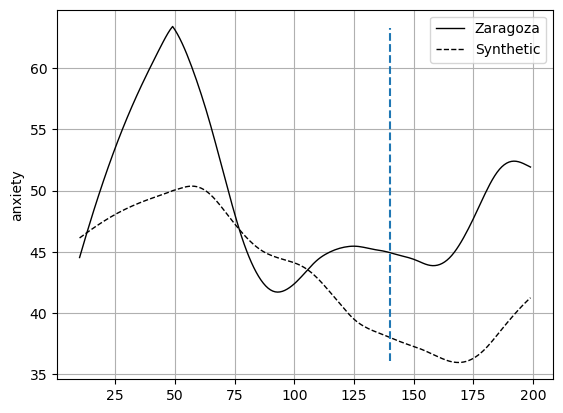

In [244]:
pen.path_plot(time_period=range(10, 200), treatment_time=140)
#pen.path_plot(time_period=range(2, 38), treatment_time=20)

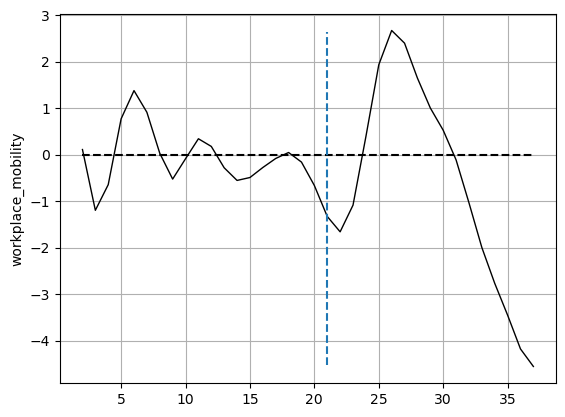

<bound method BaseSynth.summary of <pysyncon.penalized.PenalizedSynth object at 0x0000026E81614760>>

In [173]:
pen.gaps_plot(time_period=range(10, 266), treatment_time=140)
pen.gaps_plot(time_period=range(2, 38), treatment_time=21)
pen.summary

In [256]:
augsynth = AugSynth()
augsynth.fit(dataprep=dataprep)

In [257]:
print(augsynth.weights())

A Coruña             0.649
Alacant             -0.179
Albacete             0.607
Alcobendas          -0.572
Alcorcón             0.196
Algeciras            0.380
Almería             -0.606
Bilbao               0.295
Cádiz                0.394
Córdoba              0.393
Donostia            -0.547
Dos Hermanas        -0.280
Elx                 -0.653
Fuenlabrada         -0.148
Getafe               0.101
Granada             -0.167
Huelva              -0.149
Jaén                -0.121
Leganés              0.171
Logroño              0.462
Madrid               0.053
Marbella             0.638
Málaga              -0.215
Móstoles            -0.342
Ourense             -0.760
Parla               -0.023
Santander           -0.234
Sevilla              0.618
Torrejón de Ardoz    0.225
València            -0.044
Vigo                -0.101
Vitoria-Gasteiz      0.957
Name: weights, dtype: float64


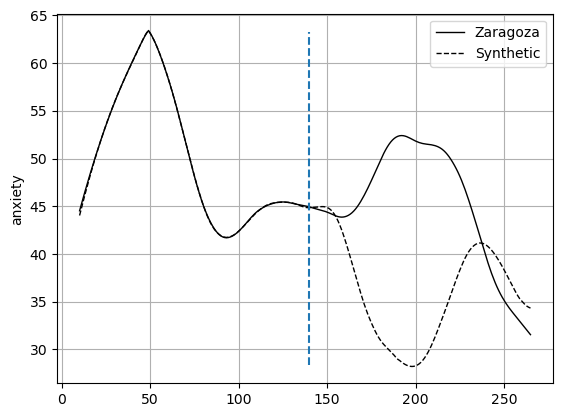

In [258]:
augsynth.path_plot(time_period=range(10, 266), treatment_time=140)
#augsynth.path_plot(time_period=range(2, 38), treatment_time=20)

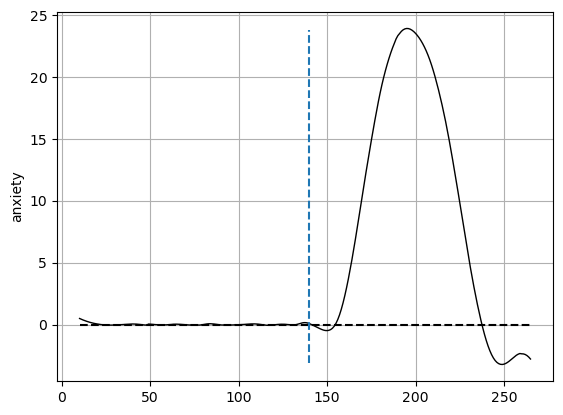

In [259]:
augsynth.gaps_plot(time_period=range(10, 266), treatment_time=140)
#augsynth.gaps_plot(time_period=range(3, 38), treatment_time=20)

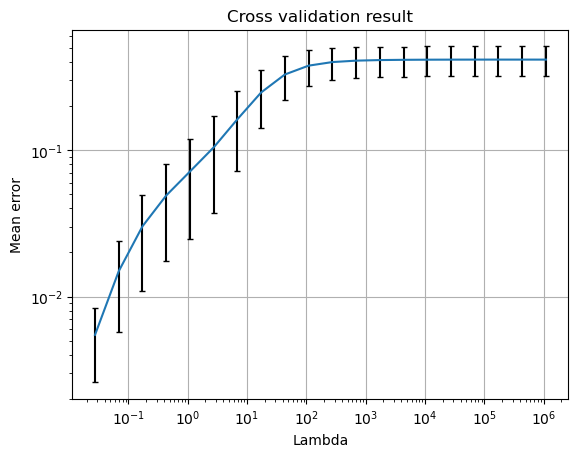

In [166]:
augsynth.cv_result.plot()

In [167]:
augsynth.summary()

,treated,synthetic,sample mean
Edad mediana de la población (años),45.420,45.423,44.447
Número medio de hijos por mujer (Número),1.230,1.230,1.177
Población residente (Personas),681.880,681.179,465.801
Superficie total (Km2),972.270,971.751,271.809
Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje),10.260,10.224,7.945
Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje),83.310,83.264,84.112
Proporción de extranjeros sobre la población total (Porcentaje),11.790,11.781,10.612
"Proporción de población entre 25-64 años con máximo nivel educación ISCED 0, 1 ó 2 (Porcentaje)",30.070,30.065,34.004
Proporción de población entre 25-64 años con máximo nivel de educación ISCED 3 ó 4 (Porcentaje),22.800,22.796,22.750
Proporción de población de 15-64 años (Porcentaje),64.600,64.607,65.917


In [203]:
robust = RobustSynth()
robust.fit(dataprep, lambda_=0.01, sv_count=3)
robust.weights()
robust.summary()

LinAlgError: SVD did not converge

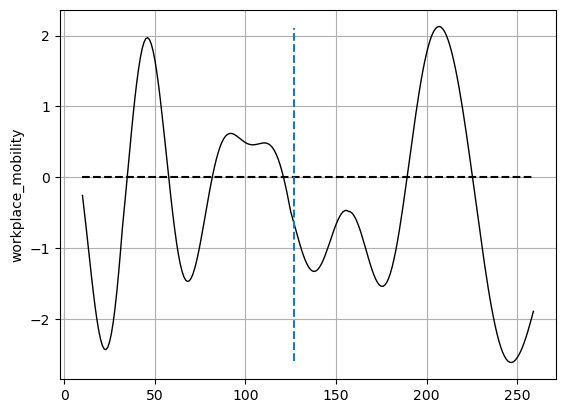

In [145]:
robust.gaps_plot(time_period=range(10, 260), treatment_time=127)
#robust.gaps_plot(time_period=range(2, 38), treatment_time=21)

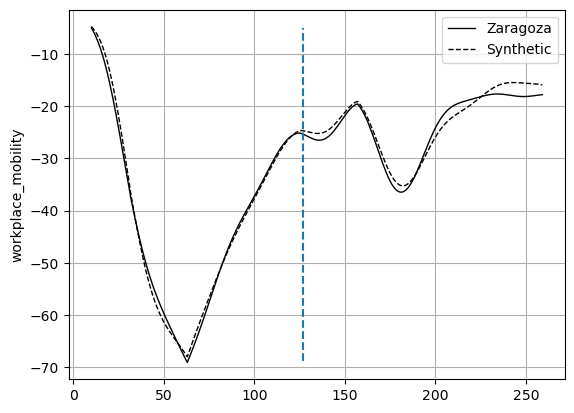

In [146]:
robust.path_plot(time_period=range(10, 260), treatment_time=127)
#robust.path_plot(time_period=range(3, 38), treatment_time=21)

In [88]:
### PANEL

dta2 = data[data['Población residente (Personas)'] > 200]
#dta2 = dta2[dta2['flag'] == 1]
dta2 = dta2[dta2['Periodo'] < 40]
dta2['pop'] = dta2['Población residente (Personas)']
dta2['redchange'] = dta2['residential_percent_change_from_baseline']


command_str='workplaces L(1:2).workplaces Valor_Containment Population | gmm(workplaces, 2:3) iv(Valor_Containment)'
#command_str='smoothed_ansiedad L(1:2).smoothed_ansiedad workplaces Valor_Containment Population | gmm(smoothed_ansiedad, 2:3) gmm(workplaces, 1:2) iv(Valor_Containment)'
#command_str='smoothed_ansiedad L(1:2).smoothed_ansiedad workplaces Population | gmm(smoothed_ansiedad, 2:2) iv(workplaces)'

mydpd = regression.abond(command_str, dta2, ['Municipios', 'Periodo'])

 Dynamic panel-data estimation, two-step system GMM
 Group variable: Municipios                        Number of obs = 1080     
 Time variable: Periodo                            Min obs per group: 36    
 Number of instruments = 112                       Max obs per group: 36    
 Number of groups = 30                             Avg obs per group: 36.00 
+-------------------+------------+---------------------+--------------+-----------+-----+
|     workplaces    |   coef.    | Corrected Std. Err. |      z       |   P>|z|   |     |
+-------------------+------------+---------------------+--------------+-----------+-----+
|   L1.workplaces   | 1.7926265  |      0.0057935      | 309.4228531  | 0.0000000 | *** |
|   L2.workplaces   | -0.8676631 |      0.0033714      | -257.3597259 | 0.0000000 | *** |
| Valor_Containment | 0.0585544  |      0.0036263      |  16.1469371  | 0.0000000 | *** |
|     Population    | -0.0002257 |      0.0000506      |  -4.4600915  | 0.0000082 | *** |
|        _

In [85]:
mydpd.models[0].regression_table

,variable,coefficient,std_err,z_value,p_value,sig
0,L1.smoothed_ansiedad,1.813234,0.014017,129.355830,0.000000,***
1,L2.smoothed_ansiedad,-0.863452,0.014355,-60.147858,0.000000,***
2,workplaces,0.000770,0.000537,1.433104,0.151828,
3,Valor_Containment,0.000320,0.000761,0.420278,0.674283,
4,Population,0.000788,0.000231,3.413524,0.000641,***
5,_con,0.106379,0.042885,2.480573,0.013117,*


In [99]:
dta['pop'] = dta['Población residente (Personas)']
dta['redchange'] = dta['residential_percent_change_from_baseline']
id_var = 'Municipios'
unit_co = list(set(dta[id_var].to_list()))
unit_co = [cou for cou in unit_co if cou != 'Zaragoza']
print(unit_co)
dta.head()

['Madrid', 'Albacete', 'Alcobendas', 'Logroño', 'Fuenlabrada', 'Almería', 'Móstoles', 'Torrejón de Ardoz', 'Leganés', 'Algeciras', 'Huelva', 'Vitoria-Gasteiz', 'València', 'Getafe', 'Sevilla', 'A Coruña', 'Jaén', 'Marbella', 'Parla', 'Vigo', 'Granada', 'Ourense', 'Santander', 'Málaga', 'Dos Hermanas', 'Bilbao', 'Córdoba', 'Cádiz', 'Alcorcón']


,Municipios,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Edad mediana de la población (años),Esperanza de vida al nacer (Años),...,Valor_GovernmentResponseIndex,Valor_EconomicSupportIndex,Valor_Containment,workplaces,ansiedad,flag,smoothed_ansiedad,Periodo,pop,redchange
date,,,,,,,,,,,,,,,,,,,,,
2020-02-23,A Coruña,2020-02-23,-0.8,1.2,23.0,9.0,3.8,-1.4,47.33,83.37,...,14.580,0.0,16.670,-6.043031,20.0,True,36.586082,1,247.6,-1.4
2020-03-01,A Coruña,2020-03-01,-2.2,-4.0,27.4,2.0,-17.6,2.4,47.33,83.37,...,11.460,0.0,13.100,-8.394668,40.0,True,37.109656,2,247.6,2.4
2020-03-08,A Coruña,2020-03-08,-3.4,1.4,-1.8,5.2,3.0,0.0,47.33,83.37,...,11.460,0.0,13.100,-13.214823,60.0,True,37.526406,3,247.6,0.0
2020-03-15,A Coruña,2020-03-15,-11.6,16.6,10.8,-6.0,-0.8,1.4,47.33,83.37,...,28.646,0.0,32.740,-23.639505,45.2,True,37.908651,4,247.6,1.4
2020-03-22,A Coruña,2020-03-22,-84.6,-43.8,-66.8,-77.0,-62.8,28.4,47.33,83.37,...,51.408,42.5,52.676,-37.996434,0.0,True,38.174205,5,247.6,28.4


In [311]:
# Set options for data preparation
id_var = 'Municipios'
outcome_var = 'smoothed_ansiedad'
time_var = 'Periodo'
features = None
cov_adj = None
period_pre = np.arange(1, 21)
period_post = np.arange(21, 35)
unit_tr = 'Zaragoza'
unit_co = list(set(dta2[id_var].to_list()))
unit_co = [cou for cou in unit_co if cou != 'Zaragoza']
constant = True
cointegrated_data = False

data_prep = scdata(df=dta2, id_var=id_var, time_var=time_var,
                   outcome_var=outcome_var, period_pre=period_pre,
                   period_post=period_post, unit_tr=unit_tr,
                   unit_co=unit_co, features=features, cov_adj=cov_adj,
                   cointegrated_data=cointegrated_data, constant=constant)

####################################
# Set options for inference
w_constr = {'name': 'simplex', 'Q': 1}
u_missp = True
u_sigma = "HC1"
u_order = 1
u_lags = 0
e_method = "gaussian"
e_order = 1
e_lags = 0
e_alpha = 0.05
u_alpha = 0.05
sims = 200
cores = 1

random.seed(8894)
result = scpi(data_prep, sims=sims, w_constr=w_constr, u_order=u_order, u_lags=u_lags,
              e_order=e_order, e_lags=e_lags, e_method=e_method, u_missp=u_missp,
              u_sigma=u_sigma, cores=cores, e_alpha=e_alpha, u_alpha=u_alpha)


####################################
# SC - plot results
print(result)
#plot = scplot(result)

####################################

-----------------------------------------------
Estimating Weights...
Quantifying Uncertainty
Maximum expected execution time: 2 minutes.
 

terations completed (10%)
terations completed (20%)
terations completed (30%)
terations completed (40%)
iterations completed (50%)
iterations completed (60%)
iterations completed (70%)
iterations completed (80%)
iterations completed (90%)
-----------------------------------------------------------------------
Call: scpi
Synthetic Control Estimation - Setup

Constraint Type:                      simplex
Constraint Size (Q):                        1
Treated Unit:                               Z
Size of the donor pool:                    29
Features                                    1
Pre-treatment period                     1-20
Pre-treatment periods (used):              20
Adjustment Covariates:                      1

Synthetic Control Estimation - Results

Active donors: 2

Coefficients:
                            Weights
ID       donor        

<Axes: >

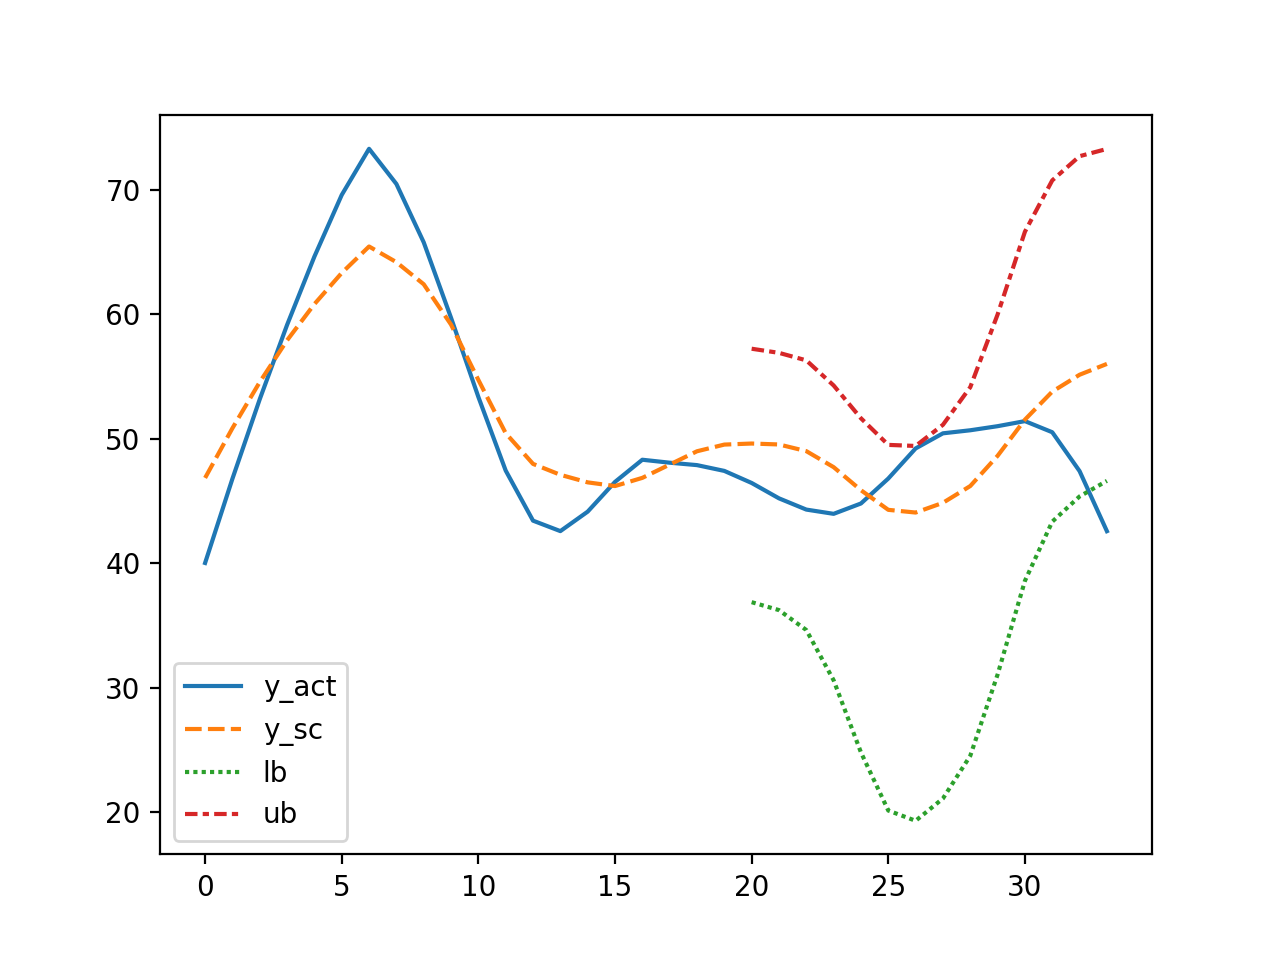

In [312]:
sc_l = result.CI_all_gaussian.iloc[:, [0]].to_numpy()
sc_r = result.CI_all_gaussian.iloc[:, [1]].to_numpy()

# Store data for treated unit
time = np.concatenate([period_pre, period_post])
y_act = pd.concat([result.Y_pre, result.Y_post]).to_numpy().flatten()
data_points_act = pd.DataFrame({'time': time,
                                    'y_act': y_act})

# Store data for synthetic control unit
y_sc_df = pd.concat([result.Y_pre_fit, result.Y_post_fit])

y_sc_na = pd.DataFrame(np.array([np.nan] * len(time)))
sc_l_na = pd.DataFrame(np.array([np.nan] * len(time)))
sc_r_na = pd.DataFrame(np.array([np.nan] * len(time)))

# Check if some periods have missing point estimate/missing CI
not_miss_plot = [t in y_sc_df.index.get_level_values(1).tolist() for t in time]
not_miss_ci = [t in result.CI_all_gaussian.index.get_level_values(1).tolist() for t in time]

y_sc_na.loc[not_miss_plot, ] = y_sc_df.iloc[:, [0]].to_numpy()
sc_l_na.loc[not_miss_ci, ] = sc_l
sc_r_na.loc[not_miss_ci, ] = sc_r

data_points_act = pd.DataFrame({'y_act': y_act
                                    })

data_points = pd.concat([data_points_act, y_sc_na,
                            sc_l_na, sc_r_na], axis=1)
data_points.columns = ['y_act', 'y_sc', 'lb', 'ub']

data_points['tr'] = ['Treated'] * len(y_sc_na)
data_points['sc'] = ['Synthetic Control'] * len(y_sc_na)

sns.lineplot(data_points)

In [282]:
dtag = pd.read_csv(r'C:\Users\juanc\Dropbox\Investigacion\Visiting IEDIS UZ\Data\eu_data.csv')
dtag['workplace_mobility']=dtag['workplaces']
dtag['days']=dtag['Periodo']
dtag2 = dtag[['country','days','workplace_closing','workplace_mobility']]
dtag2['country'] = dtag2['country'].astype(str) 
dtag2.dtypes



country                object
days                    int64
workplace_closing     float64
workplace_mobility    float64
dtype: object

<Axes: xlabel='days', ylabel='workplace_closing'>

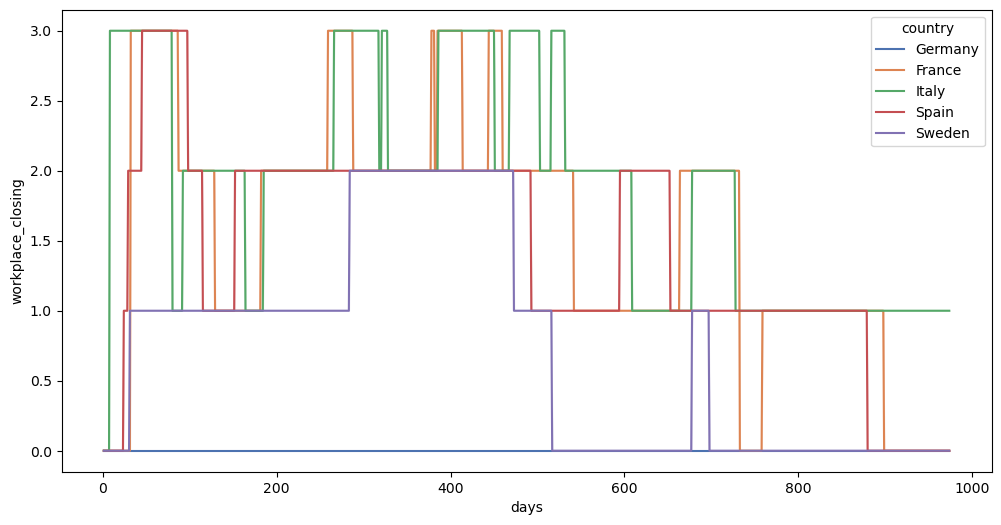

In [286]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=dtag, x='days', y='workplace_closing', hue='country', palette='deep')


In [3]:
dtag = pd.read_csv(r'C:\Users\juanc\Dropbox\Investigacion\Visiting IEDIS UZ\Data\eu_data_filtered.csv')


,country,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_raw,residential_percent_change_from_baseline,sub_region_1,iso_3166_2_code,...,workplaces,Valor_Stringency_Index,Valor_GovernmentResponseIndex,Valor_EconomicSupportIndex,Valor_Containment_Health_index,workplace_closing,daily_cases,d2,d1,Periodo
0,Germany,2020-02-15,6.0,1.0,52.0,10.0,3.0,-1.0,Baden-Württemberg,DE-BW,...,-6.951264,0.0,0.0,0.0,0.0,0.0,16.0,0,0,1
1,Germany,2020-02-16,23.0,43.0,64.0,20.0,1.0,-2.0,Baden-Württemberg,DE-BW,...,-7.310751,0.0,0.0,0.0,0.0,0.0,16.0,0,0,2
2,Germany,2020-02-17,0.0,-1.0,-11.0,0.0,-1.0,1.0,Baden-Württemberg,DE-BW,...,-7.566160,0.0,0.0,0.0,0.0,0.0,16.0,0,0,3
3,Germany,2020-02-18,4.0,3.0,16.0,1.0,0.0,1.0,Baden-Württemberg,DE-BW,...,-7.729673,0.0,0.0,0.0,0.0,0.0,16.0,0,0,4
4,Germany,2020-02-19,2.0,0.0,3.0,-2.0,-1.0,0.0,Baden-Württemberg,DE-BW,...,-7.815536,0.0,0.0,0.0,0.0,0.0,16.0,0,0,5
